[Tabular Playground Series - Feb 2021](https://www.kaggle.com/c/tabular-playground-series-feb-2021/data?select=train.csv)に取り組む。

## ライブラリのインポート、データの読み込み

In [65]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [2]:
# カテゴリデータcat0~9, cont0~13からなる
train.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1,A,B,A,A,B,D,A,E,C,...,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,6.994023
1,2,B,A,A,A,B,B,A,E,A,...,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,8.071256
2,3,A,A,A,C,B,D,A,B,C,...,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352,5.760456
3,4,A,A,A,C,B,D,A,E,G,...,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766,7.806457
4,6,A,B,A,A,B,B,A,E,C,...,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,6.868974


In [3]:
test.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
0,0,A,B,A,C,B,D,A,E,E,...,0.701679,0.595507,0.286912,0.279884,0.202234,0.242654,0.285147,0.264308,0.653654,0.302448
1,5,A,B,A,C,B,D,A,E,C,...,0.277480,0.479552,0.397436,0.476742,0.857073,0.516393,0.562065,0.730542,0.318492,0.736251
2,15,A,B,A,C,B,D,A,E,C,...,0.279508,0.676395,0.695284,0.253316,0.586934,0.548555,0.836193,0.759788,0.333572,0.273905
3,16,A,A,B,A,B,D,A,E,E,...,0.479503,0.759875,0.240049,0.298074,0.442475,0.596746,0.414131,0.255382,0.589080,0.311625
4,17,A,B,A,A,B,B,A,E,E,...,0.757845,0.210232,0.329851,0.616663,0.170475,0.263235,0.710961,0.224045,0.285860,0.794931


## データの観察

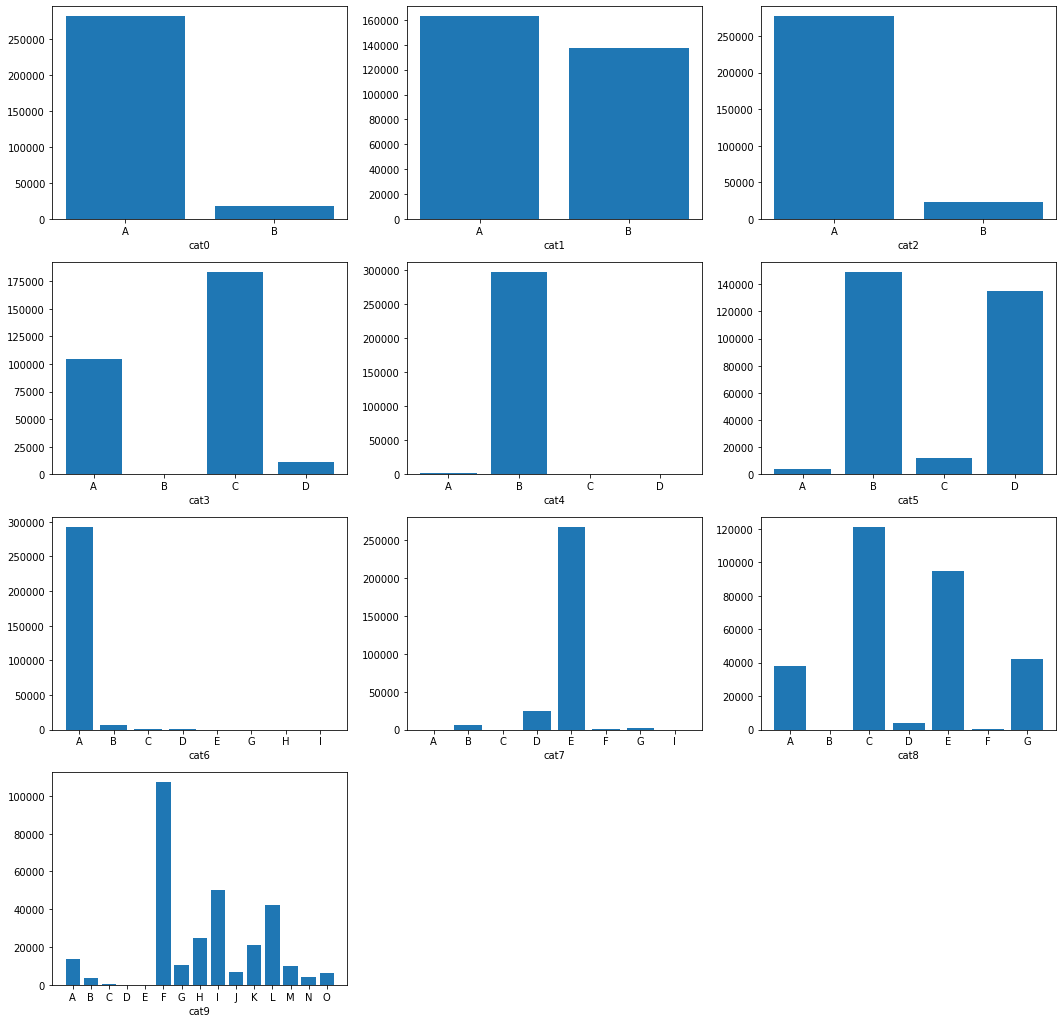

In [53]:
# カテゴリデータの観察
fig = plt.figure(figsize = (18,18))

for i in range(1,11):
    ax = fig.add_subplot(4,3,i)
    ax.bar(x = sorted(train.iloc[:,i].unique().tolist()),
           height = train.iloc[:,i].value_counts().sort_index())
    ax.set_xlabel(''.join(['cat', str(i-1)]))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 0, 'target')

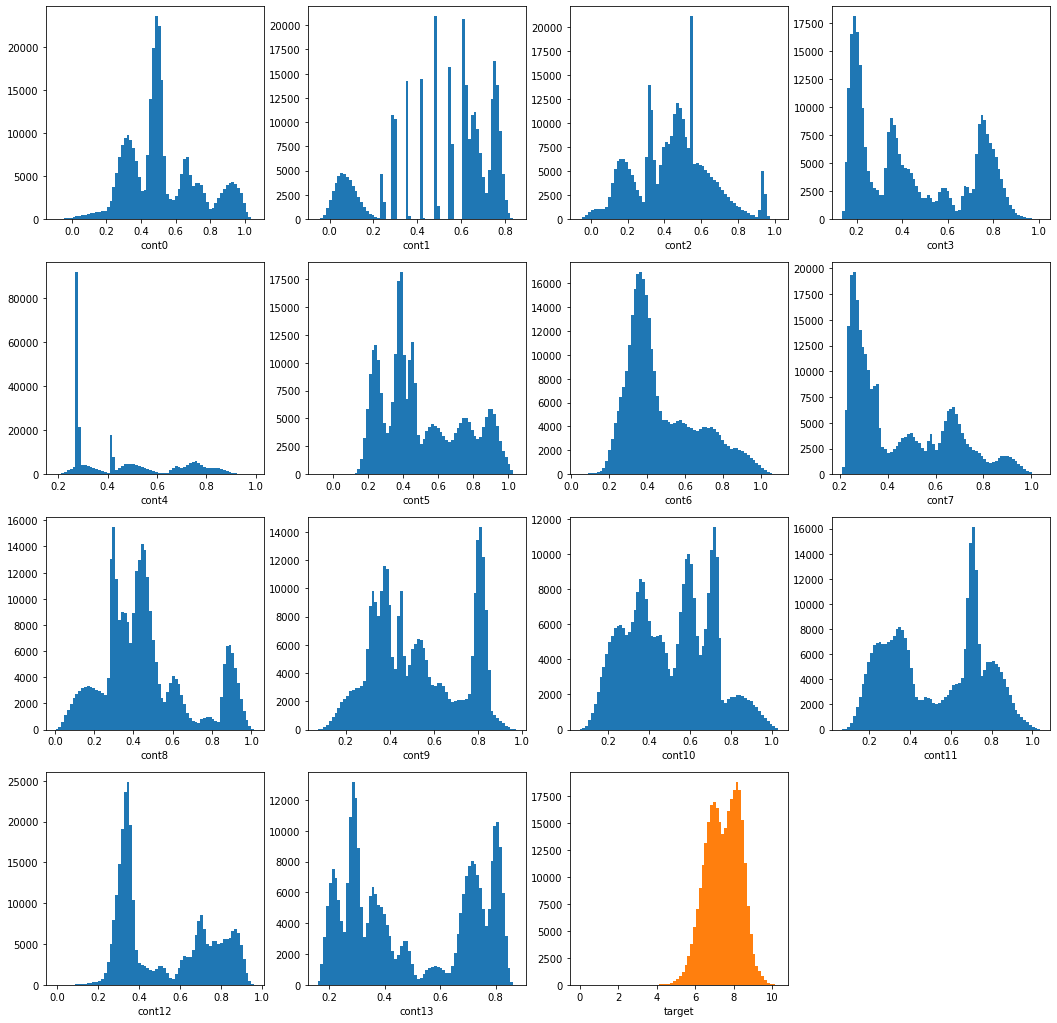

In [62]:
# 数値データの観察。数値データは先月のやつと一緒。
fig = plt.figure(figsize = (18,18))
n_bins = 70

for i in range(11, 26):
    ax = fig.add_subplot(4,4,i - 10)
    ax.hist(train.iloc[:,i], n_bins)
    ax.set_xlabel(''.join(['cont', str(i-11)]))

ax = fig.add_subplot(4,4,15)
ax.hist(train['target'], n_bins)
ax.set_xlabel('target')

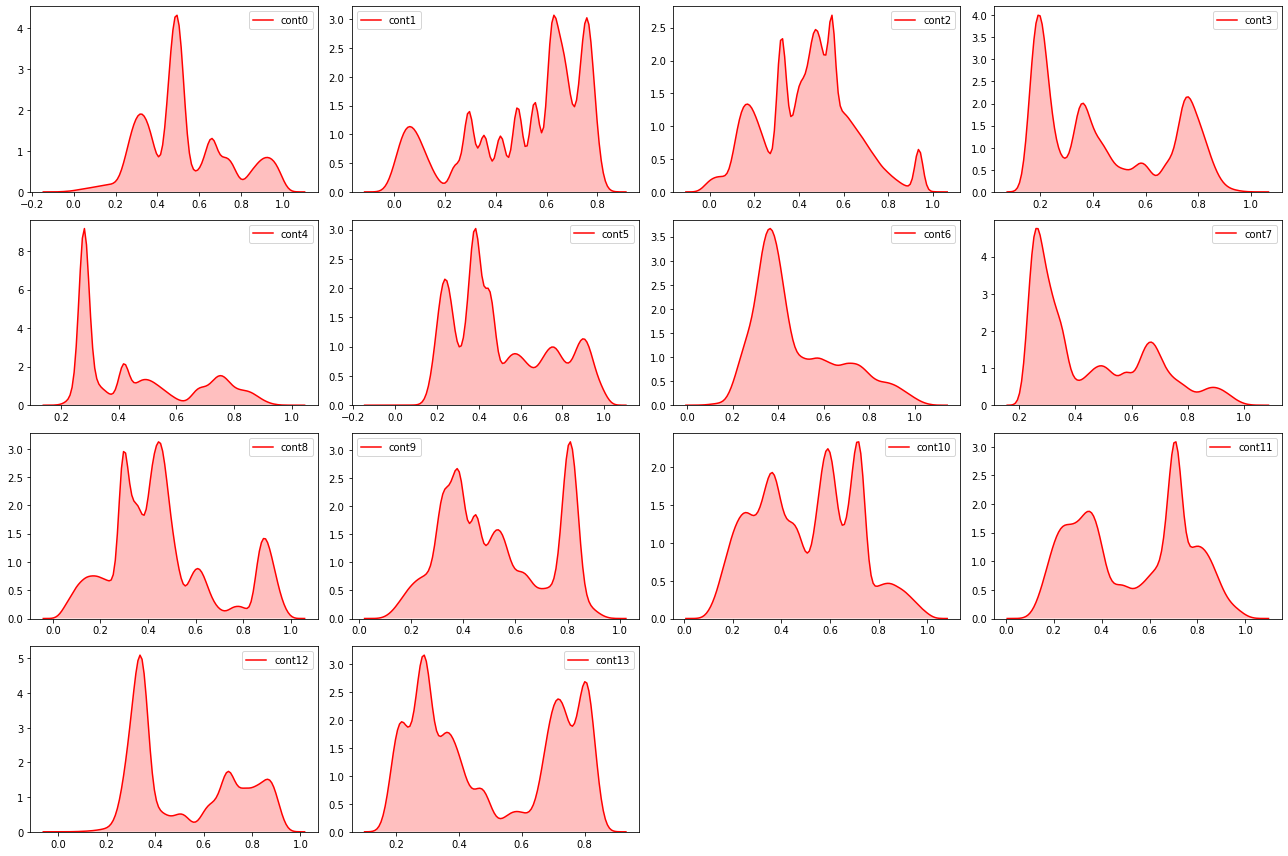

In [70]:
f, ax = plt.subplots(nrows=4, ncols=4, figsize=(18, 12))
sns.kdeplot(train.iloc[:,11], shade=True,ax=ax[0,0],color='red')
sns.kdeplot(train.iloc[:,12], shade=True,ax=ax[0,1],color='red')
sns.kdeplot(train.iloc[:,13], shade=True,ax=ax[0,2],color='red')
sns.kdeplot(train.iloc[:,14], shade=True,ax=ax[0,3],color='red')

sns.kdeplot(train.iloc[:,15], shade=True,ax=ax[1,0],color='red')
sns.kdeplot(train.iloc[:,16], shade=True,ax=ax[1,1],color='red')
sns.kdeplot(train.iloc[:,17], shade=True,ax=ax[1,2],color='red')
sns.kdeplot(train.iloc[:,18], shade=True,ax=ax[1,3],color='red')

sns.kdeplot(train.iloc[:,19], shade=True,ax=ax[2,0],color='red')
sns.kdeplot(train.iloc[:,20], shade=True,ax=ax[2,1],color='red')
sns.kdeplot(train.iloc[:,21], shade=True,ax=ax[2,2],color='red')
sns.kdeplot(train.iloc[:,22], shade=True,ax=ax[2,3],color='red')

sns.kdeplot(train.iloc[:,23], shade=True,ax=ax[3,0],color='red')
sns.kdeplot(train.iloc[:,24], shade=True,ax=ax[3,1],color='red')


f.delaxes(ax[3, 2]) # 3,2は使わないので削除
f.delaxes(ax[3, 3])
plt.tight_layout()
plt.show()

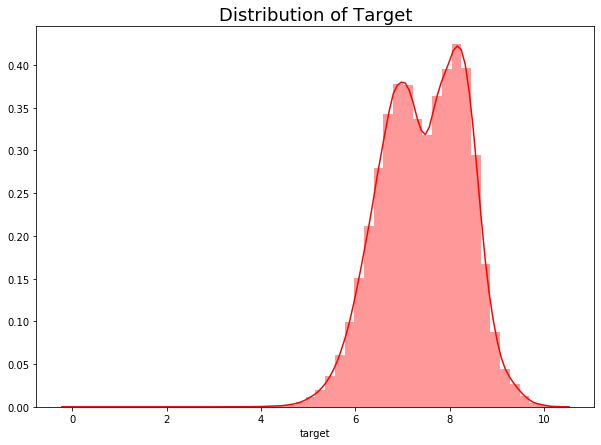

In [67]:
plt.figure(figsize=(10,7))
sns.distplot(train['target'], color= "Red" )
plt.title('Distribution of Target', fontsize=18)
plt.show()

## 前処理

[ここ](https://yolo-kiyoshi.com/2018/12/23/post-1016/)にカテゴリデータの取り扱いが書いてあった。

In [72]:
# One-Hot Encoding
train_onehot = pd.get_dummies(train.iloc[:,1:11])
train_onehot.head()

,cat0_A,cat0_B,cat1_A,cat1_B,cat2_A,cat2_B,cat3_A,cat3_B,cat3_C,cat3_D,...,cat9_F,cat9_G,cat9_H,cat9_I,cat9_J,cat9_K,cat9_L,cat9_M,cat9_N,cat9_O
0,1,0,0,1,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,1,1,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,1,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [73]:
# 正規化
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

train_normarized = mean_norm(train.iloc[:,12:-1])
train_normarized.head()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
0,0.757937,-1.597599,-0.956671,-0.867237,1.609525,-0.294622,1.396181,1.978224,1.350625,1.088936,0.744942,1.598380,0.961531
1,-2.093072,-0.433192,1.675595,-0.862589,-0.295001,-0.686556,-0.867558,0.607738,0.093896,0.537384,0.915495,-0.895780,1.354758
2,1.077374,0.052623,1.536757,-0.805775,1.752145,-0.565101,1.841925,1.841442,1.462332,-1.194942,0.717419,1.559964,1.443060
3,1.126493,-1.451255,1.201158,1.566124,1.838422,0.522702,-0.237620,1.852681,1.311126,-0.052959,0.728525,1.291354,0.494709
4,0.564032,0.260373,-0.385590,-0.878777,-0.542877,1.182727,-0.639197,-0.083184,-0.317378,1.089087,0.663324,-0.819826,-0.912920


In [80]:
train_preprocessed = pd.concat([train_onehot, train_normarized], axis = 1)
train_preprocessed['target'] = train['target']
train_preprocessed.head()

,cat0_A,cat0_B,cat1_A,cat1_B,cat2_A,cat2_B,cat3_A,cat3_B,cat3_C,cat3_D,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1,0,0,1,1,0,1,0,0,0,...,1.609525,-0.294622,1.396181,1.978224,1.350625,1.088936,0.744942,1.598380,0.961531,6.994023
1,0,1,1,0,1,0,1,0,0,0,...,-0.295001,-0.686556,-0.867558,0.607738,0.093896,0.537384,0.915495,-0.895780,1.354758,8.071256
2,1,0,1,0,1,0,0,0,1,0,...,1.752145,-0.565101,1.841925,1.841442,1.462332,-1.194942,0.717419,1.559964,1.443060,5.760456
3,1,0,1,0,1,0,0,0,1,0,...,1.838422,0.522702,-0.237620,1.852681,1.311126,-0.052959,0.728525,1.291354,0.494709,7.806457
4,1,0,0,1,1,0,1,0,0,0,...,-0.542877,1.182727,-0.639197,-0.083184,-0.317378,1.089087,0.663324,-0.819826,-0.912920,6.868974
